# **A Qml Model for Sin Function**

In [1]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.8 MB/s eta 0:00:00


In [2]:
#Importing required library

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [3]:
# preparing the required data
input_data=np.linspace(0,2*np.pi,10)
output_data=np.sin(input_data)
test_data=np.linspace(0.5,1.8*np.pi,10)
test_output=np.sin(test_data)

Here, we prepares some **test_data** to evaluate the performance of our model later.

In [4]:
dev=qml.device("default.qubit",wires=1)

@qml.qnode(dev)
def my_circuit(params,input):                                       # Define the quantum circuit with parameters and input
  qml.RY(input,wires=0)                                             # Apply a rotation around the Y-axis based on the input

  # Apply rotations around the X, Y, and Z axes based on parameters

  qml.RX(params[0],wires=0)
  qml.RY(params[1],wires=0)
  qml.RZ(params[2],wires=0)

  return qml.expval(qml.PauliZ(0))

Here, we have built a quantum circuit with some quantum operations that will do some processes to the input data that we are giving and produce us some output

In [5]:
def cost(params, input, output):
    params_np = np.array(params)
    predictions = np.array([my_circuit(params_np, x) for x in input])     # Make predictions using the quantum circuit
    cost_value = np.mean((predictions - output) ** 2)                     # Calculate the mean squared error (MSE) between predictions and actual outputs
    return cost_value

def accuracy(labels, predictions):                                        # Calculates the accuracy of predictions
    acc = sum(abs(l - p) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc

Then we defined the cost and accuracy function. The cost function actually gives us the result on how far off the input data is from the original data and the accuracy will give us how many predictions we got right.

In [6]:
optimizer=qml.AdamOptimizer(stepsize=0.1)

params=np.array([0.1,0.1,0.1],requires_grad=True)

Here, we initialized an optimizer and parameters that will find the optimal values of the parameters that minimize the cost function. Actually, by using them, we can
* 1. Train the quantum circuit: The optimizer updates the parameters to minimize the loss function, which allows the quantum circuit to learn from the data.
* 2. Optimize the quantum circuit: The optimizer finds the optimal values of the parameters that produce the desired output, which can lead to improved performance and accuracy.

In [7]:
for i in range(200):
    result = optimizer.step(cost, params, input_data, output_data)          # Updates parameters using the optimizer
    params = np.array(result[0])                                            # Extracts updated parameters
    if (i+1) % 20 == 0:
        cost_value = cost(params, input_data, output_data)                  # Calculates the cost after each step
        test_predictions = [my_circuit(params, x_test) for x_test in test_data]
        test_accuracy = accuracy(test_output, test_predictions)             # Calculates accuracy on the test data
        print(f"Iteration {i+1}: Cost = {cost_value}, Accuracy = {test_accuracy}")

Iteration 20: Cost = 0.0001618682313247473, Accuracy = 0.0
Iteration 40: Cost = 0.0053852011116879124, Accuracy = 0.0
Iteration 60: Cost = 3.4868814021052626e-08, Accuracy = 0.0
Iteration 80: Cost = 8.388930791688708e-05, Accuracy = 0.0
Iteration 100: Cost = 1.6963627475811786e-06, Accuracy = 0.0
Iteration 120: Cost = 6.064225520250333e-07, Accuracy = 0.0
Iteration 140: Cost = 1.7862093920778778e-07, Accuracy = 0.0
Iteration 160: Cost = 9.837542893993875e-09, Accuracy = 0.0
Iteration 180: Cost = 4.366818517364476e-11, Accuracy = 1.0
Iteration 200: Cost = 3.0322695778099176e-11, Accuracy = 1.0


Here, we utilize the optimizer to update the model's parameters based on the computed error and subsequent iterations. It will keep getting better.

Now we do generate results with our test_data to check if our model can generalize the test_data.

In [8]:
test_predictions = []
for x_test in test_data: # Iterate over test inputs
    prediction = my_circuit(params,x_test) # Make predictions using the trained model
    test_predictions.append(prediction)

As we have written the codes for generalizing the test_data, We will create the plt to visualize the result.

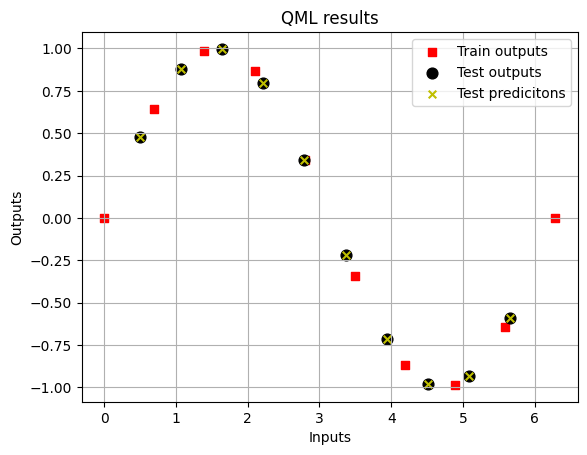

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(input_data, output_data, s=30, c='r', marker="s", label='Train outputs')
ax1.scatter(test_data,test_output, s=60, c='k', marker="o", label='Test outputs')
ax1.scatter(test_data,test_predictions, s=30, c='y', marker="x", label='Test predicitons')
plt.grid()
plt.xlabel("Inputs")
plt.ylabel("Outputs")
plt.title("QML results")

plt.legend(loc='upper right');
plt.show()

For the data sets that we provided, we can observe how well the predictions generated by our model align with the real values. This leads to our understanding of how well our QML model performs.